In [23]:
import numpy as np
import pandas as pd

import seaborn as sns

import networkx as nx

In [24]:
data_dir = "../data/"

df_user_artists = pd.read_table(f"{data_dir}hetrec2011-lastfm-2k/user_artists.dat")
df_tagged = pd.read_table(f"{data_dir}hetrec2011-lastfm-2k/user_taggedartists-timestamps.dat")
df_tags = pd.read_table(f"{data_dir}hetrec2011-lastfm-2k/tags.dat")

In [25]:
df_user_artists.head()

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983


In [26]:
df_tagged.head()

,userID,artistID,tagID,timestamp
0,2,52,13,1238536800000
1,2,52,15,1238536800000
2,2,52,18,1238536800000
3,2,52,21,1238536800000
4,2,52,41,1238536800000


In [27]:
df = pd.merge(
    df_user_artists,
    df_tagged,
    on=["userID", "artistID"],
    how="left"
)

In [28]:
df["like"] = df["timestamp"].notna()

In [29]:
df.groupby("like")["weight"].describe()

,count,mean,std,min,25%,50%,75%,max
like,,,,,,,,
False,72169.0,550.439191,1908.206989,1.0,94.0,230.0,529.0,257978.0
True,73358.0,2249.547820,10805.988128,1.0,201.0,502.0,1304.0,352698.0


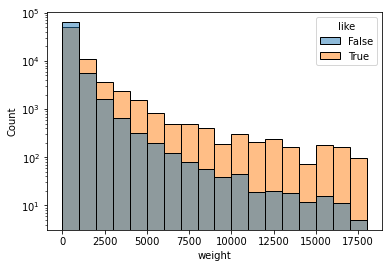

In [58]:
# Up to 99 percentile
ax = sns.histplot(data=df, x="weight", hue="like", bins=np.arange(0, df["weight"].quantile(0.99), 1000))
ax.set_yscale("log")

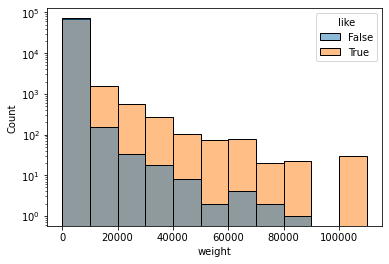

In [59]:
# Up to 99.9 percentile
ax = sns.histplot(data=df, x="weight", hue="like", bins=np.arange(0, df["weight"].quantile(0.999), 10000))
ax.set_yscale("log")

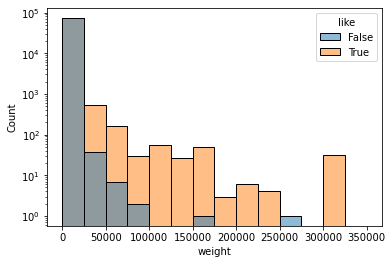

In [63]:
# Up to max
ax = sns.histplot(data=df, x="weight", hue="like", bins=np.arange(0, df["weight"].max(), 25000))
ax.set_yscale("log")